## ggplot2

***-ggplot2 is a system for declaratively creating graphics, based on The Grammar of Graphics. You provide the data, tell ggplot2 how to map variables to aesthetics, what graphical primitives to use, and it takes care of the details.***

### Installation

In [1]:
install.packages("tidyverse")

Installing package into 'C:/Users/Msc 1/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Msc 1\AppData\Local\Temp\Rtmp46lvV9\downloaded_packages


### Queries Using R

#### 1) Iris Dataset

In [2]:
library(dplyr)

iris_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = FALSE, 
                      col.names = c("sepal_length", "sepal_width", "petal_length", "petal_width", "class"))

# Filter the data to only include virginica iris flowers
virginica_data <- iris_data %>% filter(class == "Iris-virginica")

# Calculate the average petal length and width for virginica iris flowers
avg_petal_lengths <- mean(virginica_data$petal_length)
avg_petal_widths <- mean(virginica_data$petal_width)

# Output the results
cat("Average petal length for virginica iris flowers: ", round(avg_petal_lengths, 2), "cm\n")
cat("Average petal width for virginica iris flowers: ", round(avg_petal_widths, 2), "cm\n")



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Average petal length for virginica iris flowers:  5.55 cm
Average petal width for virginica iris flowers:  2.03 cm


**This code reads in the iris dataset, filters the data to only include virginica iris flowers, and calculates the average petal length and width for those flowers.**

#### 2) Wine Quality Dataset

In [3]:
library(dplyr)

wine_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                      sep = ";")

# Group the data by wine quality rating and calculate the average alcohol content for each group
avg_alcohol_by_quality <- wine_data %>% group_by(quality) %>% summarize(avg_alcohol = mean(alcohol))

# Output the results
cat("Average alcohol content by wine quality rating:\n")
print(avg_alcohol_by_quality)


Average alcohol content by wine quality rating:
# A tibble: 6 × 2
  quality avg_alcohol
    <int>       <dbl>
1       3        9.96
2       4       10.3 
3       5        9.90
4       6       10.6 
5       7       11.5 
6       8       12.1 


**This code reads in the wine quality dataset, groups the data by wine quality rating, and calculates the average alcohol content for each group.**

#### 3) Titanic Dataset

In [4]:
library(dplyr)

titanic_data <- read.csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

# Filter the data to only include female passengers
female_data <- titanic_data %>% filter(Sex == "female")

# Calculate the survival rate for female passengers
survival_rate_female <- nrow(female_data %>% filter(Survived == 1)) / nrow(female_data)

# Output the results
cat("Survival rate for female passengers: ", round(survival_rate_female * 100, 2), "%\n")


Survival rate for female passengers:  74.2 %


**This code reads in the Titanic dataset, filters the data to only include female passengers, and calculates the survival rate for those passengers.**

#### 4) Boston Housing Dataset

In [5]:
library(dplyr)

boston_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                        header = FALSE, sep = "", 
                        col.names = c("crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv"))

# Calculate the median home value for houses with 6 rooms
median_home_value <- boston_data %>% filter(rm == 6) %>% summarize(median_home_value = median(medv))

# Output the result
cat("Median home value for houses with 6 rooms: $", round(median_home_value$median_home_value, 2) * 1000, "\n")


Median home value for houses with 6 rooms: $ NA 


**This code reads in the Boston housing dataset, filters the data to only include houses**

### Data Visualization Using ggplot2

#### 1) Iris Dataset

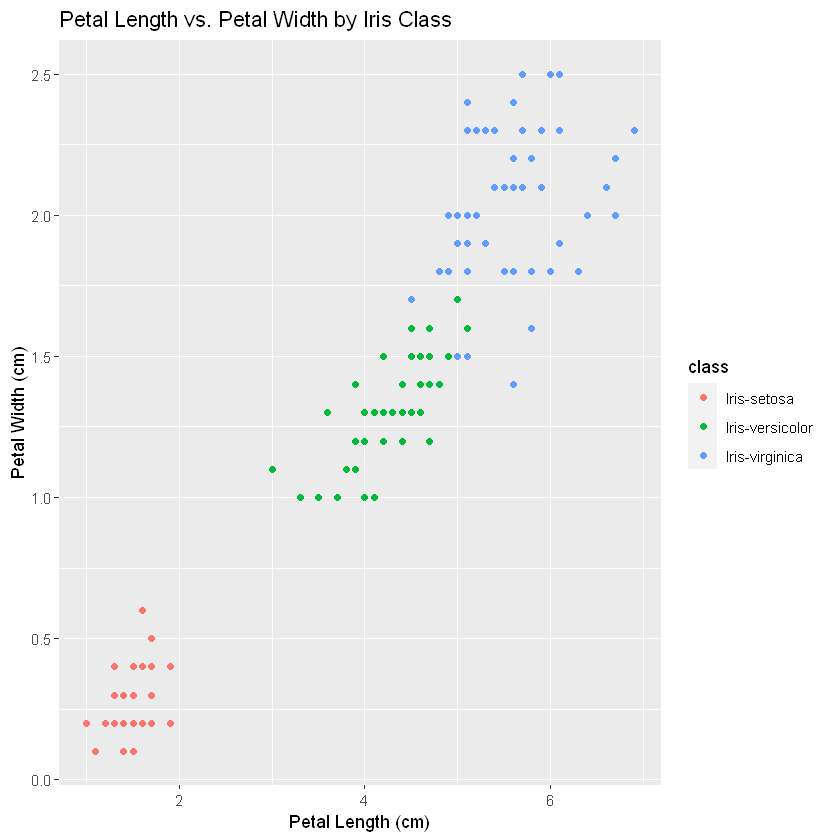

In [6]:
library(ggplot2)
library(dplyr)

iris_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = FALSE, 
                      col.names = c("sepal_length", "sepal_width", "petal_length", "petal_width", "class"))

ggplot(iris_data, aes(x = petal_length, y = petal_width, color = class)) +
  geom_point() +
  labs(title = "Petal Length vs. Petal Width by Iris Class", 
       x = "Petal Length (cm)", y = "Petal Width (cm)")


**This code creates a scatterplot of petal length versus petal width, with each data point colored by the corresponding iris class.**

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


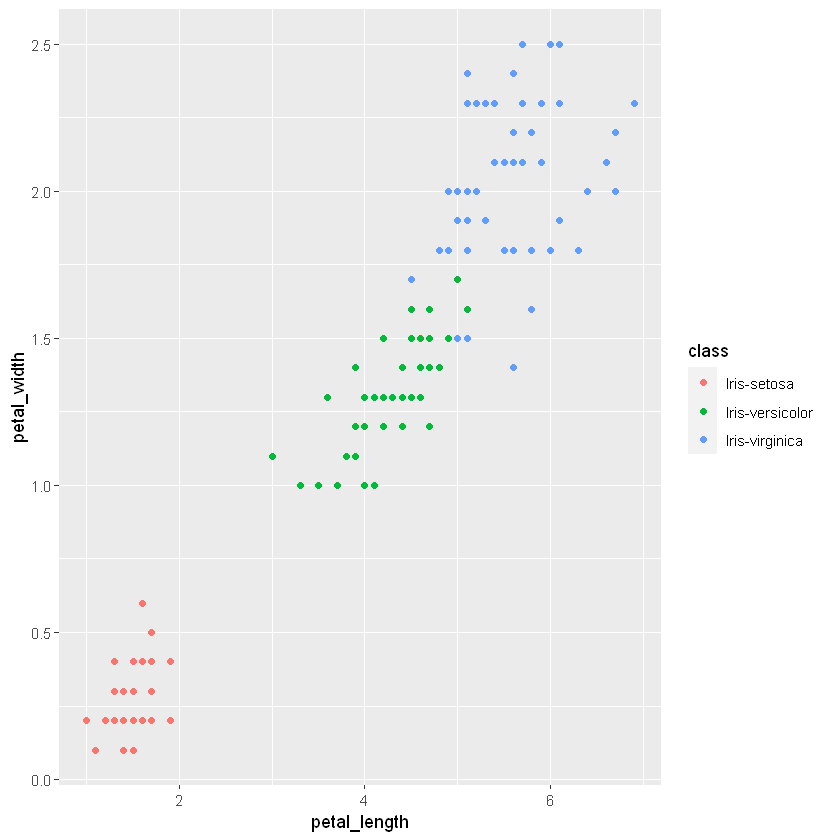

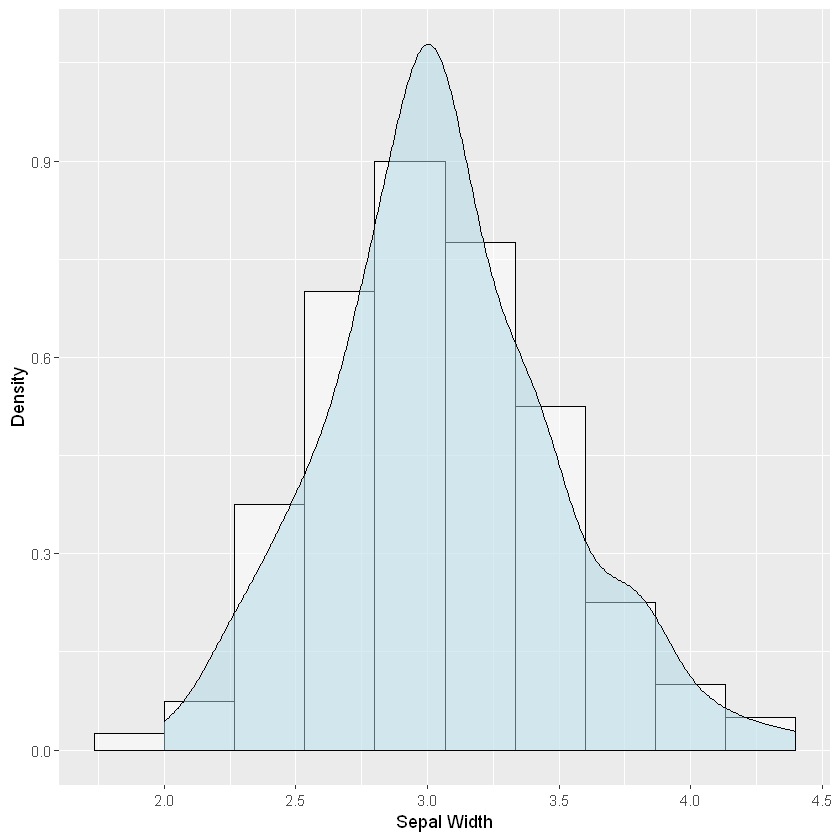

In [11]:
library(dplyr)
library(ggplot2)

iris_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = FALSE, 
                      col.names = c("sepal_length", "sepal_width", "petal_length", "petal_width", "class"))

# Scatter plot of petal length vs. petal width, colored by class
ggplot(data = iris_data, aes(x = petal_length, y = petal_width, color = class)) +
  geom_point()

# Histogram of sepal width, with a density curve overlaid
ggplot(data = iris_data, aes(x = sepal_width)) +
  geom_histogram(aes(y = ..density..), bins = 10, alpha = 0.5, color = "black", fill = "white") +
  geom_density(alpha = 0.5, fill = "lightblue") +
  xlab("Sepal Width") +
  ylab("Density")


**The first visualization creates a scatter plot of petal length vs. petal width, colored by class. The second visualization creates a histogram of sepal width with a density curve overlaid.**

#### 2) Wine Quality Dataset

Warning message:
"Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?"


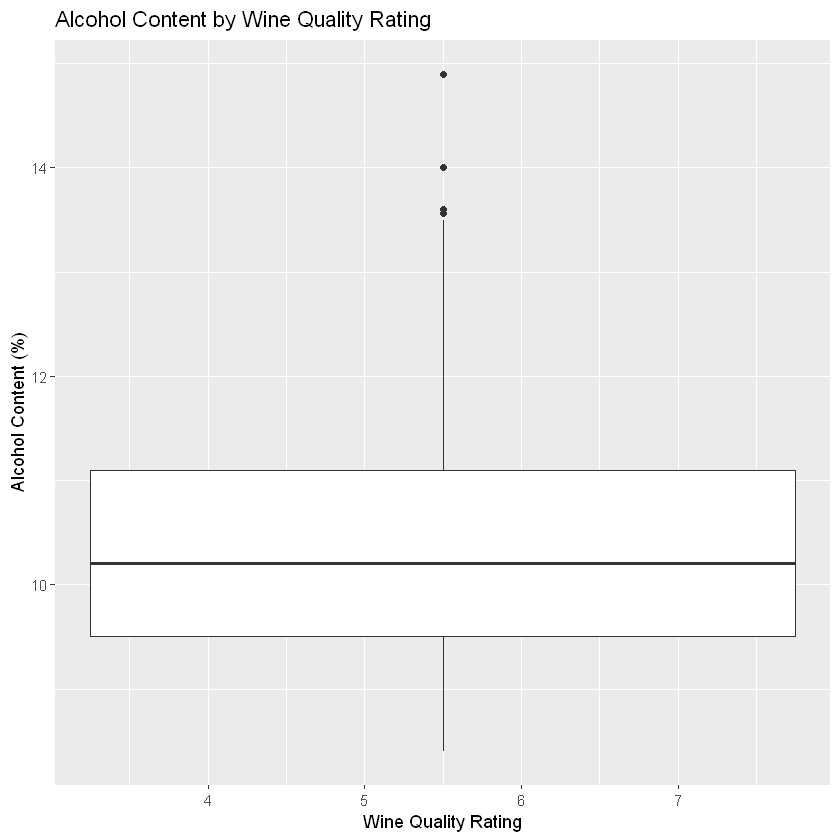

In [7]:
library(ggplot2)
library(dplyr)

wine_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                      sep = ";")

ggplot(wine_data, aes(x = quality, y = alcohol)) +
  geom_boxplot() +
  labs(title = "Alcohol Content by Wine Quality Rating", 
       x = "Wine Quality Rating", y = "Alcohol Content (%)")


**This code creates a boxplot of alcohol content by wine quality rating**

#### 3) Titanic Dataset

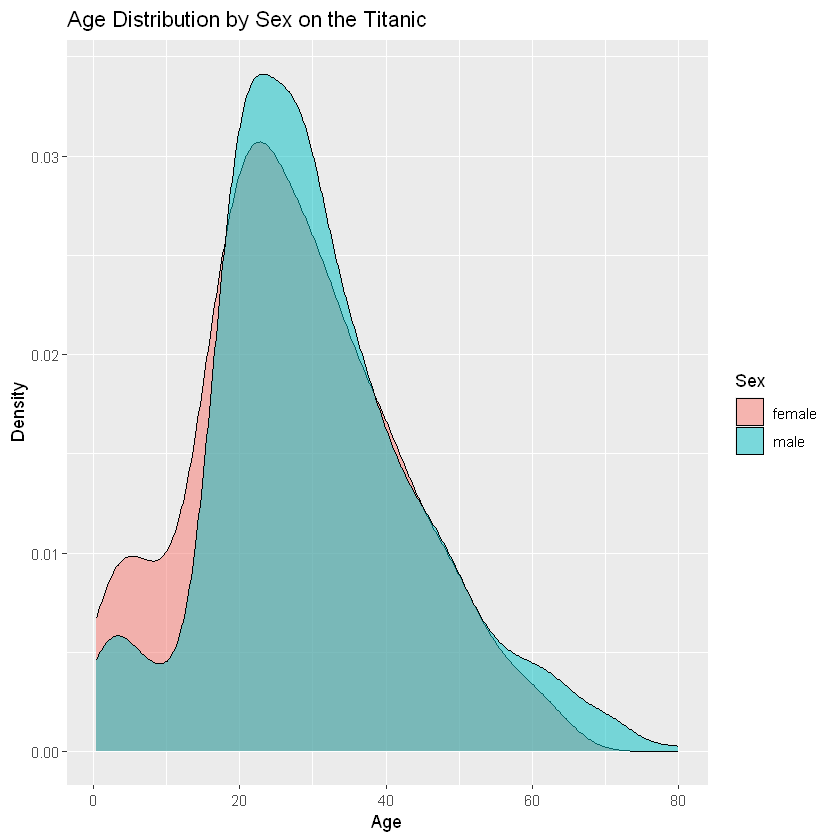

In [8]:
library(ggplot2)
library(dplyr)

titanic_data <- read.csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

ggplot(titanic_data, aes(x = Age, fill = Sex)) +
  geom_density(alpha = 0.5) +
  labs(title = "Age Distribution by Sex on the Titanic", 
       x = "Age", y = "Density")


**This code creates a density plot of age by sex on the Titanic.**

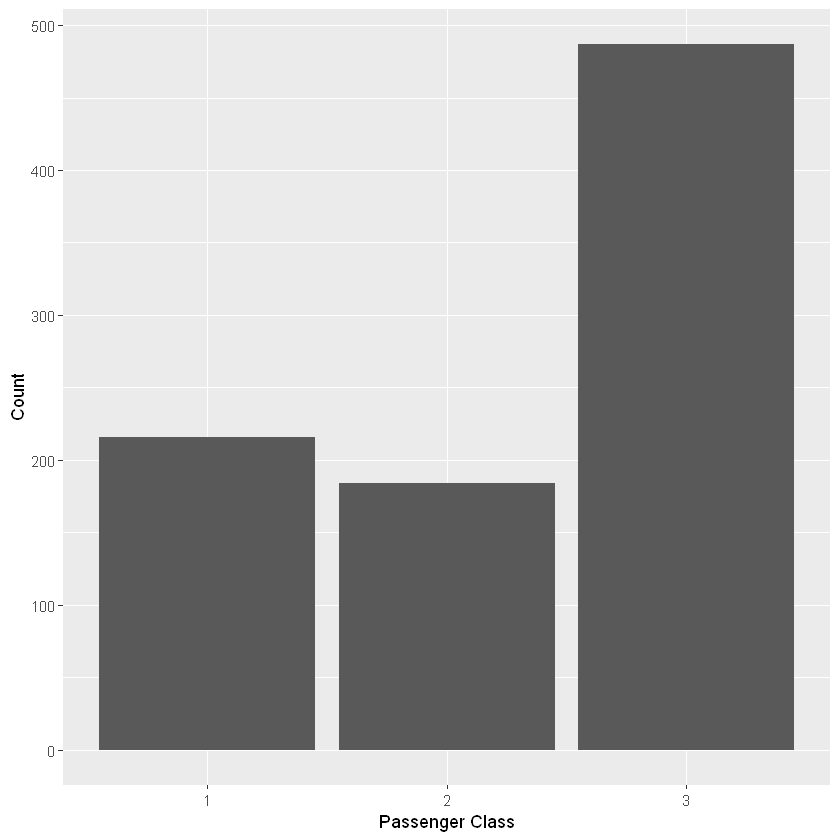

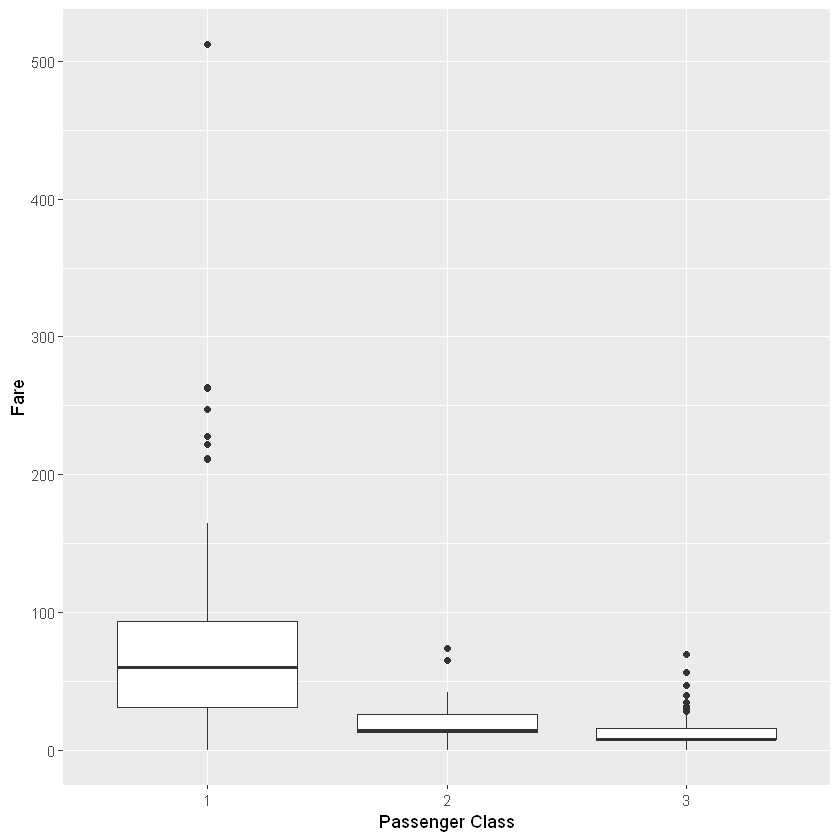

In [10]:
library(dplyr)
library(ggplot2)

titanic_data <- read.csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

# Bar chart of passenger class counts
ggplot(data = titanic_data, aes(x = factor(Pclass))) +
  geom_bar() +
  xlab("Passenger Class") +
  ylab("Count")

# Box plot of fare by passenger class
ggplot(data = titanic_data, aes(x = factor(Pclass), y = Fare)) +
  geom_boxplot() +
  xlab("Passenger Class") +
  ylab("Fare")


**The first visualization creates a bar chart of passenger class counts. The second visualization creates a box plot of fare by passenger class.**

#### 4) Boston Housing Dataset

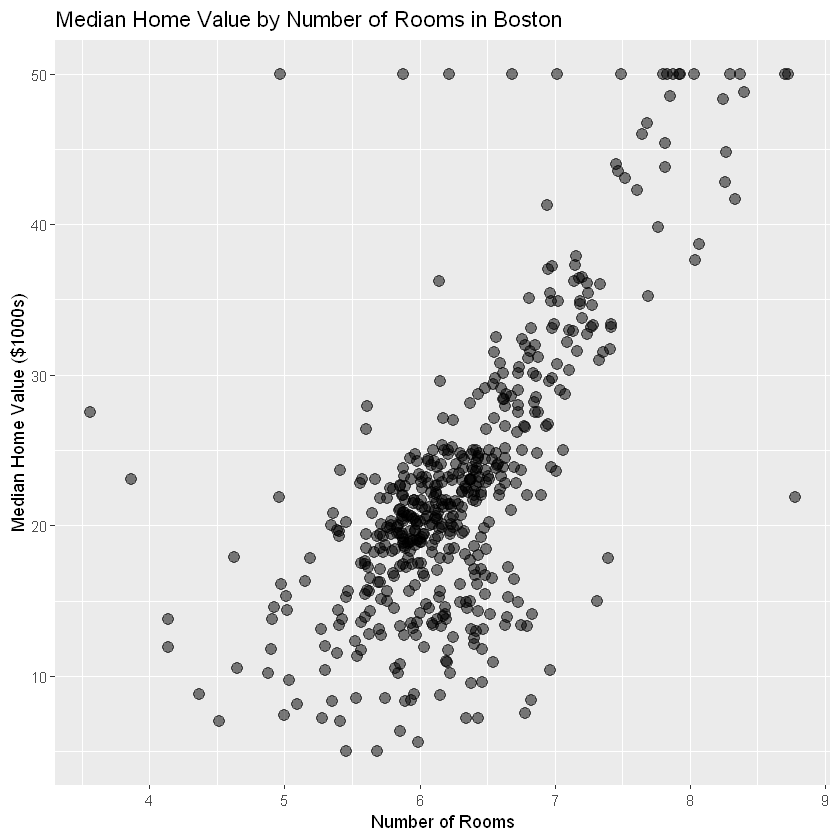

In [9]:
library(ggplot2)
library(dplyr)

boston_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                        header = FALSE, sep = "", 
                        col.names = c("crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv"))

ggplot(boston_data, aes(x = rm, y = medv)) +
  geom_point(alpha = 0.5, size = 3) +
  labs(title = "Median Home Value by Number of Rooms in Boston", 
       x = "Number of Rooms", y = "Median Home Value ($1000s)")


**This code creates a scatterplot of median home value by number of rooms in Boston.**

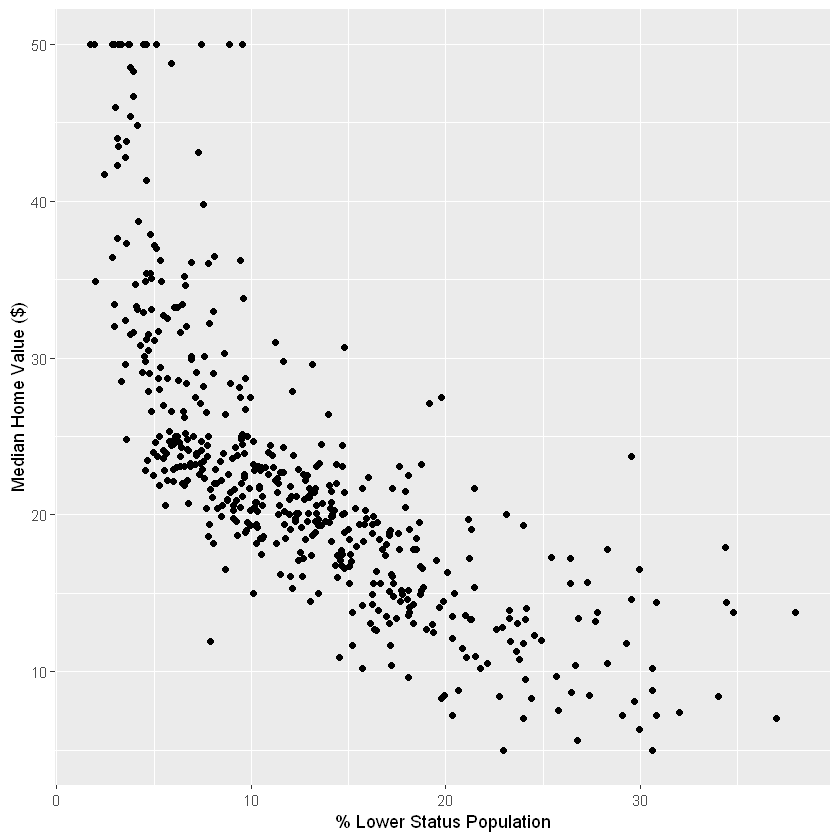

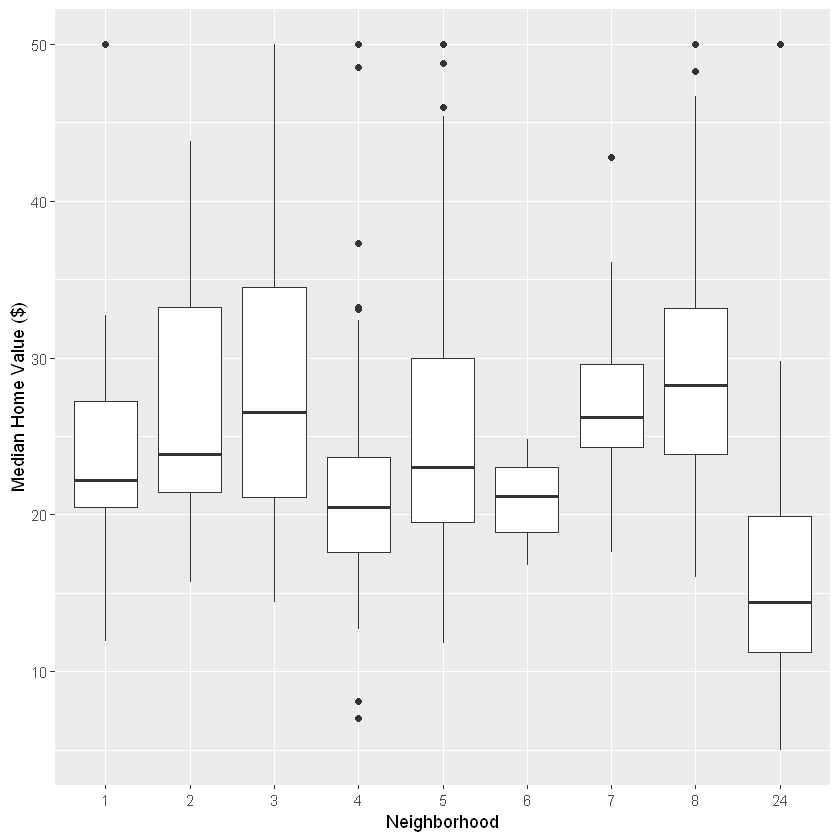

In [12]:
library(dplyr)
library(ggplot2)

boston_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                        header = FALSE, sep = "", 
                        col.names = c("crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv"))

# Scatter plot of median home value vs. percentage of lower status population
ggplot(data = boston_data, aes(x = lstat, y = medv)) +
  geom_point() +
  xlab("% Lower Status Population") +
  ylab("Median Home Value ($)")

# Box plot of median home value by neighborhood (represented by variable 'rad')
ggplot(data = boston_data, aes(x = factor(rad), y = medv)) +
  geom_boxplot() +
  xlab("Neighborhood") +
  ylab("Median Home Value ($)")


**The first visualization creates a scatter plot of median home value vs. percentage of lower status population. The second visualization creates a box plot of median home value by neighborhood.**